# Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
import scipy.stats as stats
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.preprocessing import MinMaxScaler,Normalizer, StandardScaler,RobustScaler, OneHotEncoder,OrdinalEncoder, LabelEncoder,PolynomialFeatures,KBinsDiscretizer
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, KFold,RandomizedSearchCV
from sklearn.metrics import classification_report, balanced_accuracy_score,plot_roc_curve, r2_score
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import validation_curve
from sklearn.compose import make_column_transformer,ColumnTransformer
import category_encoders as ce
from sklearn.ensemble import IsolationForest
# убрать предупреждения
import warnings
warnings.filterwarnings("ignore")

# Обучение и подгонка моделей

In [2]:
path_train = 'train.csv'
df = pd.read_csv(path_train)
df.shape

(7236, 17)

In [3]:
df.describe()

,ID,Year_of_production,Cylinders,Airbags,Tax,Price
count,7.236000e+03,7236.000000,7236.000000,7236.000000,7236.000000,7236.000000
mean,4.566946e+07,2013.227059,4.395108,6.276810,861.030127,22019.489635
std,4.604860e+05,3.034425,1.015389,3.990426,357.471378,14723.508733
min,3.255807e+07,1965.000000,1.000000,0.000000,87.000000,3500.000000
25%,4.573043e+07,2011.000000,4.000000,4.000000,640.000000,11604.000000
50%,4.578219e+07,2013.000000,4.000000,4.000000,777.000000,17876.000000
75%,4.580327e+07,2015.000000,4.000000,12.000000,1017.000000,28225.000000
max,4.581665e+07,2020.000000,12.000000,16.000000,5603.000000,83891.000000


In [4]:
df

,ID,Brand,Model,Year_of_production,Type,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box,Drive_wheels,Doors,Color,Airbags,Tax,Price
0,45774636,OPEL,Combo,2003,Goods wagon,No,Diesel,1.7,152000 km,4.0,Manual,Front,04-May,Grey,2,1438,9408
1,45787352,MERCEDES-BENZ,Vito,2008,Minivan,No,Diesel,2.2 Turbo,198700 km,4.0,Manual,Rear,02-Mar,White,6,1195,17000
2,45393419,TOYOTA,CHR,2018,Jeep,No,Petrol,2,37214 km,4.0,Automatic,Front,04-May,Grey,10,1079,36065
3,45802407,HYUNDAI,Grandeur,2012,Sedan,Yes,Petrol,3,137235 km,4.0,Automatic,Front,04-May,Silver,4,919,15524
4,45647870,MERCEDES-BENZ,ML 350,2015,Jeep,Yes,Diesel,3.5,79080 km,6.0,Automatic,4x4,04-May,Grey,12,1273,22894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,45768179,LEXUS,CT 200h,2014,Hatchback,Yes,Hybrid,1.8,132563 km,4.0,Automatic,Front,04-May,Red,0,308,11447
7232,45621866,HYUNDAI,Sonata,2014,Sedan,No,Petrol,2.4,148800 km,4.0,Tiptronic,Front,04-May,Black,6,749,18503
7233,45732832,HYUNDAI,Sonata,2015,Sedan,Yes,LPG,2,283895 km,4.0,Automatic,Front,04-May,Silver,4,765,15367
7234,45802992,HYUNDAI,Santa FE,2010,Jeep,Yes,Diesel,2,229398 km,4.0,Automatic,Front,04-May,Black,4,836,19008


In [5]:
def engvol(s):
    global b
    if len(s) >= 3:
        b = float(s[0]+s[1] +s[2])
    elif len(s) == 1:
        b = float(s[0])
    return (b)
df['Engine_volume'] = [engvol(i) for i in df['Engine_volume']]

In [6]:
def doors(s):
    a = float(s[1])
    return (a)
df['Doors'] = [doors(i) for i in df['Doors']]

In [7]:
for i in df['Mileage'].index:
    df['Mileage'][i] = int(df['Mileage'][i].replace(' km',''))
df = df.astype({'Mileage':'float'})

In [8]:
df['Leather_interior'] = np.where(df['Leather_interior'] == "Yes",1,0)

In [9]:
df.dtypes

ID                      int64
Brand                  object
Model                  object
Year_of_production      int64
Type                   object
Leather_interior        int32
Fuel_type              object
Engine_volume         float64
Mileage               float64
Cylinders             float64
Gear_box               object
Drive_wheels           object
Doors                 float64
Color                  object
Airbags                 int64
Tax                     int64
Price                   int64
dtype: object

# preprocessing

In [10]:
numcol = ['Year_of_production','Mileage','Engine_volume','Airbags','Tax' ]
ct = ColumnTransformer([
      ('ord', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=564),
      ['Model','Brand','Fuel_type','Gear_box','Drive_wheels','Color','Type']),
      ('scale', StandardScaler(),
      numcol)
      ],
      remainder='passthrough')

In [11]:
df.drop(df[df.Mileage>500000].index, inplace = True)

### убираем аномалии

In [12]:
def anomalies_report(anomalies):
    return print("Аномалий: {}\nПроцент аномалий:   {:.2f}%".format(sum(anomalies), 100*np.mean(anomalies))) 

In [13]:
df_scaled = ct.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=ct.get_feature_names_out())

In [14]:
isolation_forest = IsolationForest(n_estimators=100, 
                                   contamination=0.05, 
                                   #max_features=1, 
                                   #bootstrap=True
                                  )
isolation_forest.fit(df_scaled.values)

isolation_predict = isolation_forest.predict(df_scaled.values)
anomalies = np.where(isolation_predict < 0, True, False)
anomalies_report(anomalies)

Аномалий: 357
Процент аномалий:   5.01%


In [15]:
isolation_data = df_scaled.copy()
isolation_data['is_anomalies'] = anomalies

#sns.pairplot(data=isolation_data,
#             hue ='is_anomalies', hue_order=[1, 0], 
#             diag_kind="kde",
#             diag_kws=dict(common_norm=False), 
#             markers=['o','X'],  palette='bright');

In [16]:
mask_anomaly = np.where(isolation_predict < 0, False, True)
df = df.iloc[mask_anomaly]

In [17]:
y = df['Price']
X = df.drop(columns=['ID', 'Price'])

### отбираем фичи

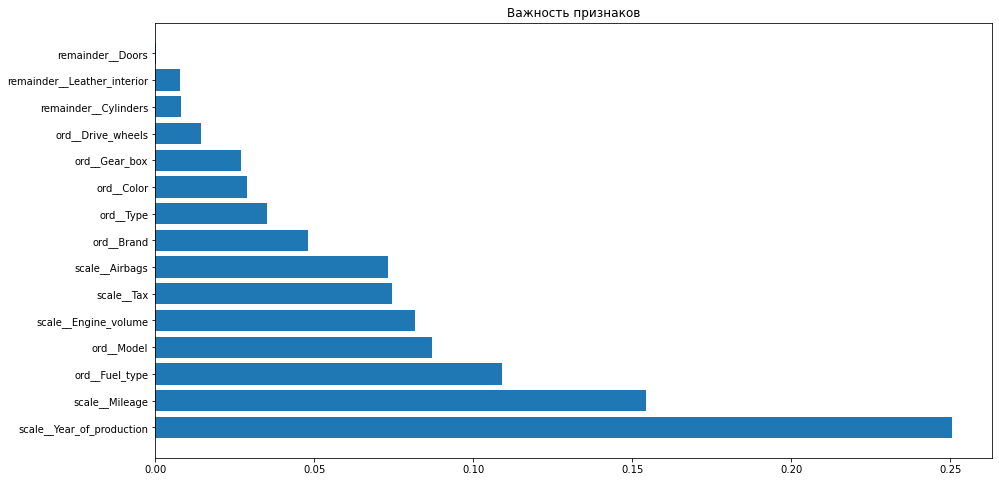

In [18]:
X_train, X_test, y_train, y_test = train_test_split(ct.fit_transform(X), y, random_state=0, test_size=.3)

rfc = RandomForestRegressor(n_estimators=100, random_state=42)
rfc.fit(X_train,y_train)

plt.figure(figsize=(15,8))
feature_names = np.array(ct.get_feature_names_out())  #X.columns)
#importance = rfc.feature_importances_

importance = np.sort(rfc.feature_importances_)
importance_name = np.argsort(rfc.feature_importances_)

plt.barh(width=importance, y = feature_names[importance_name] )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

In [19]:
y = df['Price']
X = df[['Gear_box','Brand','Type','Airbags','Tax','Model','Fuel_type','Engine_volume','Mileage','Year_of_production']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
X_train.shape, y_train.shape

((4736, 10), (4736,))

In [21]:
numcol = ['Year_of_production','Mileage','Engine_volume','Airbags','Tax' ]
ct = ColumnTransformer([
      ('ord', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=564),
      ['Model','Brand','Fuel_type','Gear_box','Type']),
      ('scale', StandardScaler(),
      numcol)
      ],
      remainder='passthrough')
ctrf = ColumnTransformer([
     ('ord', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=564),
      ['Model','Brand','Fuel_type','Gear_box','Type'])
      ],
      remainder='passthrough')


# RandomForest

In [21]:
pipe = Pipeline([('preprocessing', ctrf),
                    ('reg', RandomForestRegressor())])

max_features = ['auto', 'sqrt']
max_depth =[2,3,4,5,6,7]
max_depth.append(None)
min_samples_split = [2, 5, 6,]
min_samples_leaf = [1, 2, 3,4,5]

random_grid = {
               'reg__n_estimators': n_estimators,
               'reg__max_features': max_features,
               'reg__max_depth': max_depth,
               'reg__min_samples_split': min_samples_split,
               'reg__min_samples_leaf': min_samples_leaf,
               }
grid = RandomizedSearchCV(pipe, random_grid, cv = 5, n_jobs = -1, scoring='neg_mean_absolute_percentage_error')
grid.fit(X_train,y_train)
print(grid.best_params_ , grid.best_score_)
print(grid.score(X_train,y_train), grid.score(X_test,y_test))  
y_pred= grid.predict(X_test)
print('RF mape: ', mean_absolute_percentage_error(y_test,y_pred))
print('RF r2 score: ', r2_score(y_test, y_pred))

{'reg__n_estimators': 200, 'reg__min_samples_split': 6, 'reg__min_samples_leaf': 1, 'reg__max_features': 'auto', 'reg__max_depth': None} -0.31234464707954973
-0.15583973888076447 -0.2861562975247001
RF mape:  0.2861562975247001
RF r2 score:  0.7796636359098645


In [23]:
piperf = make_pipeline(ctrf, RandomForestRegressor(n_estimators=200, min_samples_split=6,min_samples_leaf=1, max_features='auto'))
piperf.fit(X_train,y_train)
y_pred = piperf.predict(X_test)
print('RF mape: ', mean_absolute_percentage_error(y_test,y_pred))
print('RF r2 score: ', r2_score(y_test, y_pred))

RF mape:  0.285491597394408
RF r2 score:  0.7788806104766227


# GB

In [24]:
pipe = Pipeline([('preprocessing', ct),
                    ('reg', GradientBoostingRegressor())])


max_features = [1,2,3]
max_depth = [2,3,4]
max_depth.append(None)
min_samples_split = [1,3, 2]
min_samples_leaf = [4, 5, 6]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

random_grid = {
               'reg__learning_rate':learning_rate,
               'reg__max_features': max_features,
               'reg__max_depth': max_depth,
               #'reg__min_samples_split': min_samples_split,
               'reg__min_samples_leaf': min_samples_leaf,
               }
grid = RandomizedSearchCV(pipe, random_grid, cv =5, verbose=2, n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error', random_state=42)
grid.fit(X_train,y_train)
print( grid.best_params_)
print(grid.score(X_train,y_train), grid.score(X_test,y_test)) 
y_pred= grid.predict(X_test)
print('GB mape: ', mean_absolute_percentage_error(y_test,y_pred))
print('GB r2 score: ', r2_score(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'reg__min_samples_leaf': 5, 'reg__max_features': 2, 'reg__max_depth': None, 'reg__learning_rate': 0.1}
-0.07479803174061142 -0.2572618879916269
GB mape:  0.2572618879916269
GB r2 score:  0.7848884024091677


In [26]:
pipegb = make_pipeline(ct, GradientBoostingRegressor(max_depth=None, max_features=2, min_samples_leaf=5,
                          n_estimators=200))
pipegb.fit(X_train,y_train)
y_pred = pipegb.predict(X_test)
print('RF mape: ', mean_absolute_percentage_error(y_test,y_pred))
print('RF r2 score: ', r2_score(y_test, y_pred))

RF mape:  0.25523647014785755
RF r2 score:  0.7790133328613124


# SVR

In [37]:
pipe = Pipeline([('preprocessing', ct),
                    ('reg', SVR())])

random_grid = {'reg__kernel': ['rbf'], 
               'reg__gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
               'reg__C': [1, 10, 100, 1000, 10000]}

grid = GridSearchCV(pipe, random_grid, cv = 3, verbose=2, n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error')
grid.fit(X_train,y_train)
print( grid.best_params_)
print(grid.score(X_train,y_train), grid.score(X_test,y_test)) 
y_pred= grid.predict(X_test)
print('SVR mape: ', mean_absolute_percentage_error(y_test,y_pred))
print('SVR r2 score: ', r2_score(y_test, y_pred))

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'reg__C': 10000, 'reg__gamma': 0.6, 'reg__kernel': 'rbf'}
-0.14401035873007656 -0.3049822360974515
SVR mape:  0.3049822360974515
SVR r2 score:  0.6460202223813849


# Linear

In [26]:
pipe = Pipeline([('preprocessing', ct),
                    ('reg', Lasso())])

alpha = [0.01, 0.05, 0.1, 0.15, 0.2, 1, 10]
scaling = [MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid = [ 
    {'preprocessing__scale':scaling,
     'reg': [ElasticNet(), Lasso(), Ridge()],
     'reg__alpha':alpha}]
grid = GridSearchCV(pipe, param_grid, cv=5,  n_jobs=-1, scoring = 'neg_mean_absolute_percentage_error')
grid.fit(X_train,y_train)
print(grid.best_params_ , grid.best_score_)
y_pred= grid.predict(X_test)
print('Linear mape: ', mean_absolute_percentage_error(y_test,y_pred))
print('Linear r2 score: ', r2_score(y_test, y_pred))

{'preprocessing__scale': MinMaxScaler(), 'reg': Lasso(alpha=10), 'reg__alpha': 10} -0.636623189054873
Linear mape:  0.6598573810559787
Linear r2 score:  0.3586593630252066


лучшие показатели в GradientBoosting